In [1]:
import scipy.spatial
import pysal as ps
import numpy as np
from pointpattern import PointPattern
from process import PoissonPointProcess as csr
from window import as_window
%matplotlib inline
import matplotlib.pyplot as plt
from distance_statistics import G, F, J, k, K, L
from distance_statistics import Genv, Fenv, Jenv

In [2]:
points = [[66.22, 32.54], [22.52, 22.39], [31.01, 81.21], [9.47, 31.02],
               [30.78, 60.10], [75.21, 58.93], [79.26,  7.68], [8.23, 39.93],
               [98.73, 80.53], [89.78, 42.53], [65.19, 92.08], [54.46, 8.48]]
p1 = PointPattern(points)

In [3]:
p1.summary()

Point Pattern
12 points
Bounding rectangle [(8.23,7.68), (98.73,92.08)]
Area of window: 7638.2
Intensity estimate for window: 0.00157105077112


In [4]:
kp1 = k(p1)

In [5]:
kp1

array([[    0.        ,     0.        ],
       [   12.37481717,    26.52152778],
       [   24.74963434,   132.60763889],
       [   37.12445151,   477.3875    ],
       [   49.49926868,   716.08125   ],
       [   61.87408585,  1113.90416667],
       [   74.24890302,  1352.59791667],
       [   86.62372019,  1644.33472222],
       [   98.99853736,  1697.37777778],
       [  111.37335453,  1750.42083333],
       [  123.7481717 ,  1750.42083333],
       [  136.12298887,  1750.42083333]])

In [6]:
kp1 = K(p1)

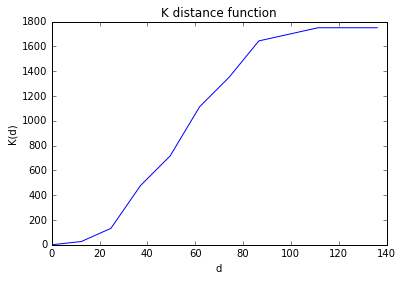

In [7]:
kp1.plot()

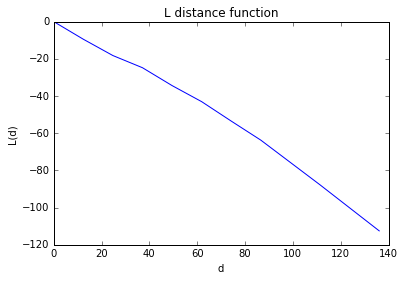

In [8]:
lp1 = L(p1)
lp1.plot()

In [ ]:
kp1.plot()

In [ ]:
k(p1, intervals=20)

In [ ]:
bb

In [ ]:
dbb = np.sqrt((bb[0]-bb[2])**2 + (bb[1]-bb[3])**2)

In [ ]:
dbb

In [ ]:
kf.max()

In [ ]:
kf[kf>0].mean()

In [ ]:
q= kp1[kp1>=40.5]

In [ ]:
q.shape

In [ ]:
x = np.arange(0.1, 100.1, 1.)

In [ ]:
r = [ kp1[kp1>=d].shape[1] for d in x]

In [ ]:
r

In [ ]:
gp1 = G(p1, intervals=20)
gp1.plot()

In [ ]:
fp1 = F(p1, intervals=20)
fp1.plot()

In [ ]:
jp1 = J(p1, intervals=20)
jp1.plot()

In [ ]:
realizations = csr(p1.window, p1.n, 100, asPP=True)
genv = Genv(p1, intervals=20, realizations=realizations)

In [ ]:
genv.observed

In [ ]:
genv.plot()

In [ ]:
fenv = Fenv(p1, intervals=20, realizations=realizations)
fenv.plot()

In [ ]:
jenv = Jenv(p1, intervals=20, realizations=realizations)
jenv.plot()

## Virgina UTM N17 Example


In [ ]:
from pysal.contrib import shapely_ext
va = ps.open(ps.examples.get_path("vautm17n.shp"))
polys = [shp for shp in va]
state = shapely_ext.cascaded_union(polys)

In [ ]:
pp = csr(as_window(state), 100, 1, asPP=True).realizations[0]

In [ ]:
plt.plot(pp.points[:,0], pp.points[:,1], '.')

In [ ]:
# G function using mbb
pp_bb = PointPattern(pp.points)


In [ ]:
# csr in bb
csrs = csr(pp_bb.window, 100, 100, asPP=True)

In [ ]:
genv_bb = Genv(pp_bb, realizations=csrs)
genv_bb.plot()

In [ ]:
# now csr in state window
csrs = csr(as_window(state), 100, 100, asPP=True)

In [ ]:
genv = Genv(pp, realizations=csrs)
genv.plot()